In [ ]:
## Document ##
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

## import

In [274]:
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.svm import SVC,  LinearSVC
from sklearn.metrics import f1_score

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## load data

In [2]:
df = pd.read_csv("groupby5th.csv", encoding="utf-8")

In [10]:
df_7 = pd.read_csv("groupby6th.csv", encoding="utf-8")
df["cluster_7"] = df_7["cluster_7"]

In [12]:
df.to_csv("clustered.csv")

In [4]:
df = df.drop(columns = ["Unnamed: 0", "Unnamed: 0.1"])

### n=5, LGBMclassifier

In [275]:
X = df.iloc[:, 1:-2].values
y = df.iloc[:, [-2]].values

In [276]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [277]:
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

Text(0, 0.5, 'Number of occurrences')

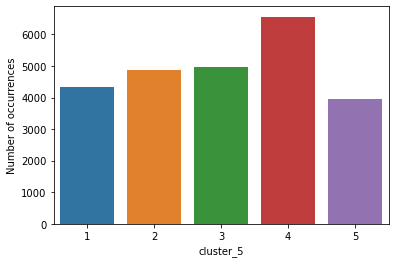

In [278]:
sns.countplot(y_train)
plt.xlabel('cluster_5')
plt.ylabel('Number of occurrences')

In [279]:
# define parameter
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', lgb.LGBMClassifier())
], verbose=True)
pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('clf', LGBMClassifier())],
         verbose=True)

In [280]:
# define parameter grid
param_grid ={'clf__learning_rate' : [1, 0.1, 0.01, 0.001],
             'clf__boosting_type' : ['gbdt'],
             'clf__objective' : ['multiclass'],
             'clf__num_leaves' : [np.random.randint(20, 300) for _ in range(3)],
             'clf__max_depth' : [np.random.randint(5, 200) for _ in range(3)]
            }
param_grid

{'clf__learning_rate': [1, 0.1, 0.01, 0.001],
 'clf__boosting_type': ['gbdt'],
 'clf__objective': ['multiclass'],
 'clf__num_leaves': [29, 116, 221],
 'clf__max_depth': [197, 104, 148]}

In [281]:
cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=33)

In [282]:
grid_search=GridSearchCV(estimator=pipeline,
                         param_grid=param_grid,
                         cv=cv,
                         scoring='accuracy',
                         n_jobs=-1,
                        verbose=2)

In [283]:
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.1min finished


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.7s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=33, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', LGBMClassifier())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'clf__boosting_type': ['gbdt'],
                         'clf__learning_rate': [1, 0.1, 0.01, 0.001],
                         'clf__max_depth': [197, 104, 148],
                         'clf__num_leaves': [29, 116, 221],
                         'clf__objective': ['multiclass']},
             scoring='accuracy', verbose=2)

In [284]:
# 최적 parameter
grid_search.best_params_

{'clf__boosting_type': 'gbdt',
 'clf__learning_rate': 0.1,
 'clf__max_depth': 197,
 'clf__num_leaves': 29,
 'clf__objective': 'multiclass'}

In [285]:
# 교차검증의 평균 정확도
grid_search.best_score_

0.4664567213676493

In [286]:
# 최종 test 결과 - accuracy
grid_search.score(x_test, y_test)

0.4531756318859365

In [287]:
# 최종 test 결과 - f1
y_pred = grid_search.predict(x_test)
f1_score(y_test, y_pred, average='micro')

0.4531756318859365

### n=7 LGBMClassifier

In [288]:
X = df.iloc[:, 1:-2].values
y = df.iloc[:, [-1]].values

In [289]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [290]:
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [291]:
# define parameter
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', lgb.LGBMClassifier())
], memory="./", verbose=True)
pipeline

Pipeline(memory='./',
         steps=[('scaler', StandardScaler()), ('clf', LGBMClassifier())],
         verbose=True)

In [292]:
# define parameter grid
param_grid ={'clf__learning_rate' : [1, 0.1, 0.01, 0.001],
             'clf__boosting_type' : ['gbdt'],
             'clf__objective' : ['multiclass'],
             'clf__num_leaves' : [np.random.randint(20, 300) for _ in range(5)],
             'clf__max_depth' : [np.random.randint(5, 200) for _ in range(5)]}
param_grid

{'clf__learning_rate': [1, 0.1, 0.01, 0.001],
 'clf__boosting_type': ['gbdt'],
 'clf__objective': ['multiclass'],
 'clf__num_leaves': [37, 288, 232, 46, 281],
 'clf__max_depth': [9, 37, 180, 151, 176]}

In [293]:
cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=33)

In [294]:
grid_search=GridSearchCV(estimator=pipeline,
                         param_grid=param_grid,
                         cv=cv,
                         scoring='accuracy',
                         n_jobs=-1,
                        verbose=2)

In [295]:
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  9.8min finished


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   1.9s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=33, shuffle=True),
             estimator=Pipeline(memory='./',
                                steps=[('scaler', StandardScaler()),
                                       ('clf', LGBMClassifier())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'clf__boosting_type': ['gbdt'],
                         'clf__learning_rate': [1, 0.1, 0.01, 0.001],
                         'clf__max_depth': [9, 37, 180, 151, 176],
                         'clf__num_leaves': [37, 288, 232, 46, 281],
                         'clf__objective': ['multiclass']},
             scoring='accuracy', verbose=2)

In [296]:
# 최적 parameter
grid_search.best_params_

{'clf__boosting_type': 'gbdt',
 'clf__learning_rate': 0.1,
 'clf__max_depth': 9,
 'clf__num_leaves': 288,
 'clf__objective': 'multiclass'}

In [297]:
# 교차검증의 평균 정확도
grid_search.best_score_

0.4149248739474836

In [298]:
# 최종 test 결과 - accuracy
grid_search.score(x_test, y_test)

0.41250810110174985

In [299]:
# 최종 test 결과 - f1
y_pred = grid_search.predict(x_test)
f1_score(y_test, y_pred, average='micro')

0.41250810110174985

### LinearSVC (n=5)

In [300]:
X = df.iloc[:, 1:-2].values
y = df.iloc[:, [-2]].values

In [301]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [302]:
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [303]:
# define parameter
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LinearSVC())
], verbose=True)
pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('clf', LinearSVC())],
         verbose=True)

In [304]:
# define parameter grid
param_grid ={
             'clf__C' : [1] + [np.random.random() for _ in range(5)],
             }
param_grid

{'clf__C': [1,
  0.6033262402900167,
  0.32378155171539735,
  0.4426232374029573,
  0.882459673393653,
  0.8838425506995811]}

In [305]:
cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=33)

In [306]:
grid_search=GridSearchCV(estimator=pipeline,
                         param_grid=param_grid,
                         cv=cv,
                         scoring='accuracy',
                         n_jobs=-1,
                        verbose=2)

In [307]:
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  9.7min finished


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=  39.6s


C:\Users\Donggeon\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=33, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', LinearSVC())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'clf__C': [1, 0.6033262402900167, 0.32378155171539735,
                                    0.4426232374029573, 0.882459673393653,
                                    0.8838425506995811]},
             scoring='accuracy', verbose=2)

In [308]:
# 최적 parameter
grid_search.best_params_

{'clf__C': 0.8838425506995811}

In [309]:
# 교차검증의 평균 정확도
grid_search.best_score_

0.43963753460249066

In [310]:
# 최종 test 결과 - accuracy
grid_search.score(x_test, y_test)

0.42757615035644847

In [311]:
# 최종 test 결과 - f1
y_pred = grid_search.predict(x_test)
f1_score(y_test, y_pred, average='micro')

0.4275761503564485

### LinearSVC(n=7)

In [312]:
X = df.iloc[:, 1:-2].values
y = df.iloc[:, [-1]].values

In [313]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [314]:
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [315]:
# define parameter
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LinearSVC())
], verbose=True)
pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('clf', LinearSVC())],
         verbose=True)

In [316]:
# define parameter grid
param_grid ={
             'clf__C' : [1] + [np.random.random() for _ in range(5)],
             }
param_grid

{'clf__C': [1,
  0.07958606575076788,
  0.6581898045104709,
  0.6040642247849836,
  0.8844922257049729,
  0.8448117851554376]}

In [317]:
cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=33)

In [318]:
grid_search=GridSearchCV(estimator=pipeline,
                         param_grid=param_grid,
                         cv=cv,
                         scoring='accuracy',
                         n_jobs=-1,
                        verbose=2)

In [319]:
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 13.9min finished


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=  46.2s


C:\Users\Donggeon\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=33, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', LinearSVC())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'clf__C': [1, 0.07958606575076788, 0.6581898045104709,
                                    0.6040642247849836, 0.8844922257049729,
                                    0.8448117851554376]},
             scoring='accuracy', verbose=2)

In [320]:
# 최적 parameter
grid_search.best_params_

{'clf__C': 0.07958606575076788}

In [321]:
# 교차검증의 평균 정확도
grid_search.best_score_

0.3866069406507796

In [322]:
# 최종 test 결과 - accuracy
grid_search.score(x_test, y_test)

0.3797796500324044

In [323]:
# 최종 test 결과 - f1
y_pred = grid_search.predict(x_test)
f1_score(y_test, y_pred, average='micro')

0.3797796500324044

## SVC (n=5)

In [324]:
X = df.iloc[:, 1:-2].values
y = df.iloc[:, [-2]].values

In [325]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [326]:
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [327]:
# define parameter
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC())
], verbose=True)
pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('clf', SVC())], verbose=True)

In [328]:
# define parameter grid
param_grid ={
             'clf__C' : [1.0] + [np.random.random() for _ in range(5)],
    'clf__kernel' : ['linear', 'rbf']
             }
param_grid

{'clf__C': [1.0,
  0.36857308362947894,
  0.6368995953658172,
  0.0806397872997785,
  0.29980350297145597,
  0.38518723187265813],
 'clf__kernel': ['linear', 'rbf']}

In [329]:
cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=33)

In [330]:
grid_search=GridSearchCV(estimator=pipeline,
                         param_grid=param_grid,
                         cv=cv,
                         scoring='accuracy',
                         n_jobs=-1,
                        verbose=2)

In [331]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 17.8min finished


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total= 1.6min


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=33, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', SVC())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'clf__C': [1.0, 0.36857308362947894,
                                    0.6368995953658172, 0.0806397872997785,
                                    0.29980350297145597, 0.38518723187265813],
                         'clf__kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

In [332]:
# 최적 parameter
grid_search.best_params_

{'clf__C': 1.0, 'clf__kernel': 'rbf'}

In [333]:
# 교차검증의 평균 정확도
grid_search.best_score_

0.4466052488256406

In [334]:
# 최종 test 결과 - accuracy
grid_search.score(x_test, y_test)

0.4374594944912508

In [335]:
# 최종 test 결과 - f1
y_pred = grid_search.predict(x_test)
f1_score(y_test, y_pred, average='micro')

0.4374594944912508

## SVC (n=7)

In [336]:
X = df.iloc[:, 1:-2].values
y = df.iloc[:, [-1]].values

In [337]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

In [338]:
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [339]:
# define parameter
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC())
], verbose=True)
pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('clf', SVC())], verbose=True)

In [340]:
# define parameter grid
param_grid ={
             'clf__C' : [1.0] + [np.random.random() for _ in range(5)],
        'clf__kernel' : ['linear', 'rbf']
             }
param_grid

{'clf__C': [1.0,
  0.268555818769469,
  0.777362724922474,
  0.8323393959640799,
  0.4948673139474854,
  0.9392734977595808],
 'clf__kernel': ['linear', 'rbf']}

In [341]:
cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=33)

In [342]:
grid_search=GridSearchCV(estimator=pipeline,
                         param_grid=param_grid,
                         cv=cv,
                         scoring='accuracy',
                         n_jobs=-1,
                        verbose=2)

In [343]:
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 43.1min finished


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total= 1.3min


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=33, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', SVC())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'clf__C': [1.0, 0.268555818769469, 0.777362724922474,
                                    0.8323393959640799, 0.4948673139474854,
                                    0.9392734977595808],
                         'clf__kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

In [344]:
# 최적 parameter
grid_search.best_params_

{'clf__C': 1.0, 'clf__kernel': 'rbf'}

In [345]:
# 교차검증의 평균 정확도
grid_search.best_score_

0.39073760989593487

In [346]:
# 최종 test 결과 - accuracy
grid_search.score(x_test, y_test)

0.3849643551523007

In [347]:
# 최종 test 결과 - f1
y_pred = grid_search.predict(x_test)
f1_score(y_test, y_pred, average='micro')

0.38496435515230076